In [1]:
import pandas as pd
from src import constants as Con
from src.viz import visualisations as V

In [2]:
hunters = pd.read_csv('../data/hunters.csv')
gatherers = pd.read_csv('../data/gatherers.csv')
all_participants = pd.concat([hunters, gatherers], ignore_index=True)

In [3]:
PAPER_DIRS = ["papers/correctness_prediction/figures"]

C:\Users\deeth\PycharmProjects\QA_eyetracking\src\viz\visualisations_area_bars.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


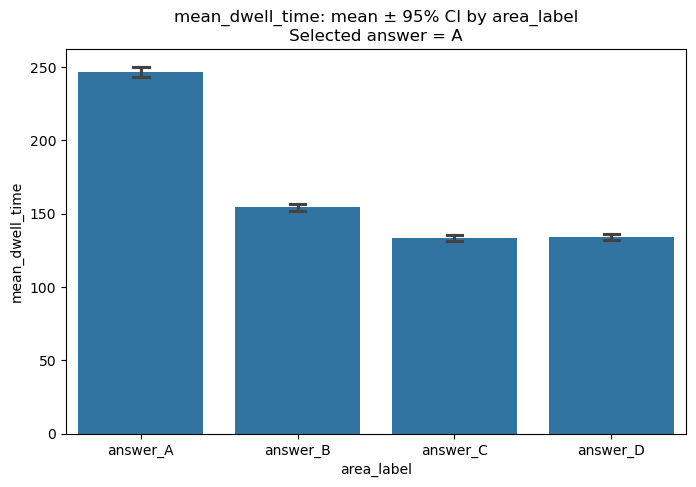

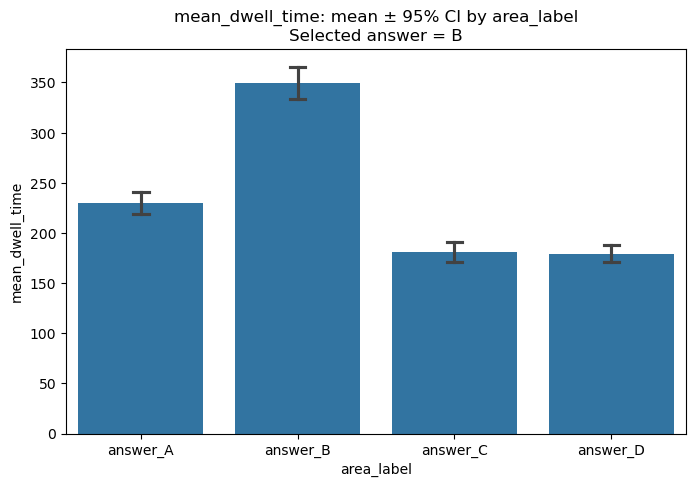

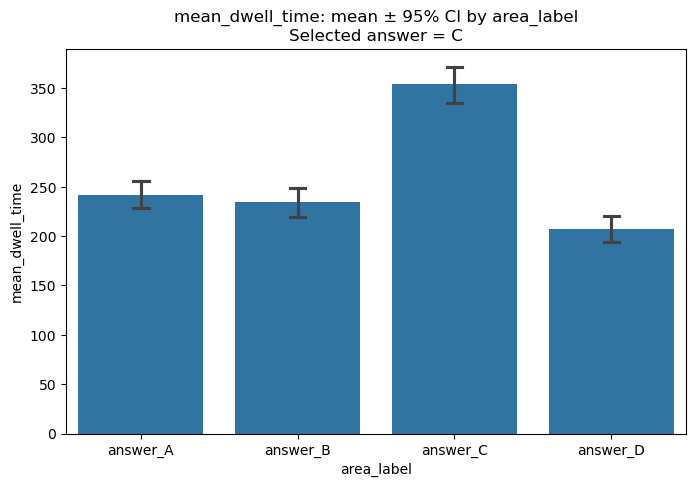

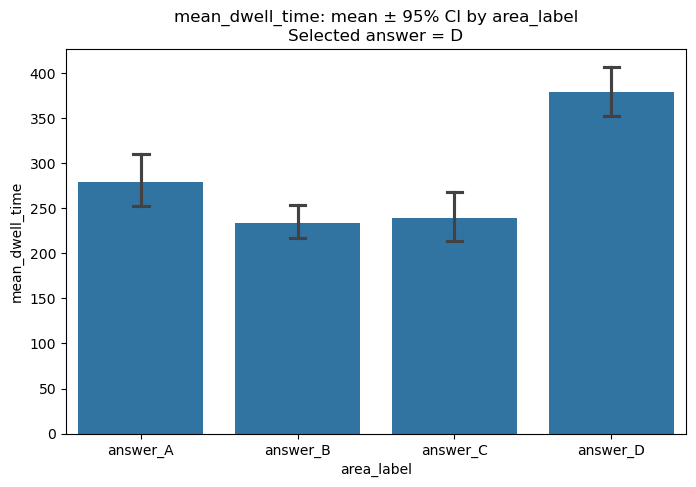

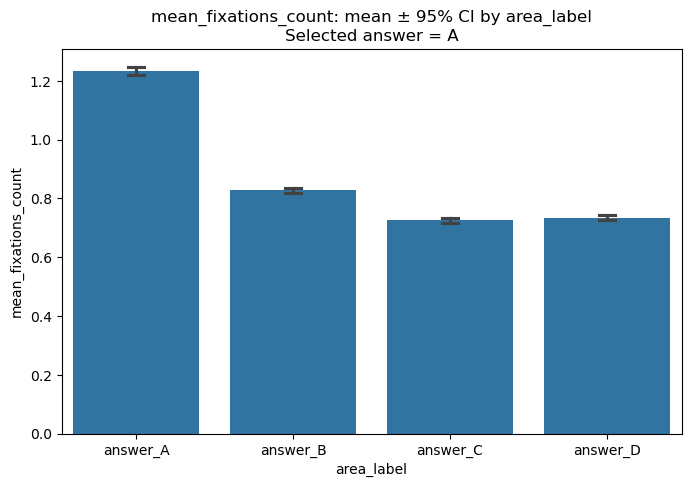

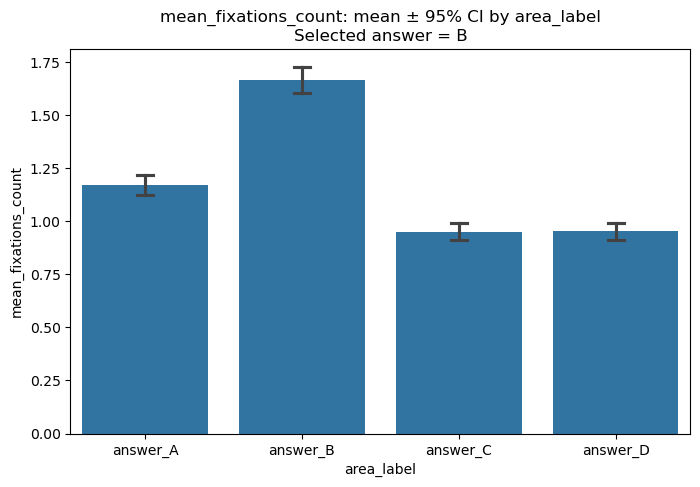

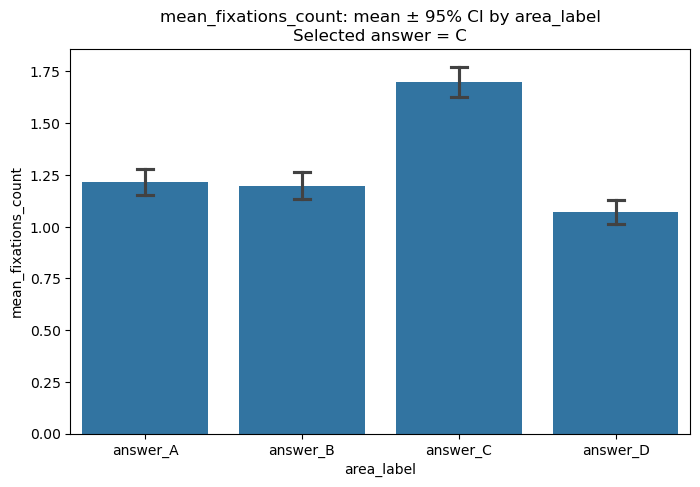

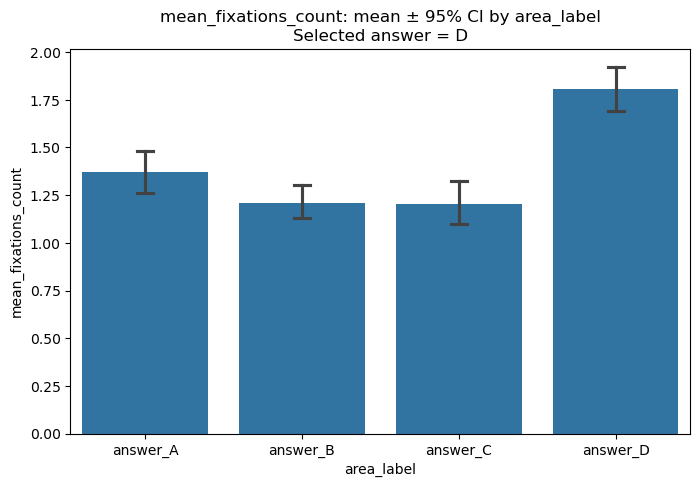

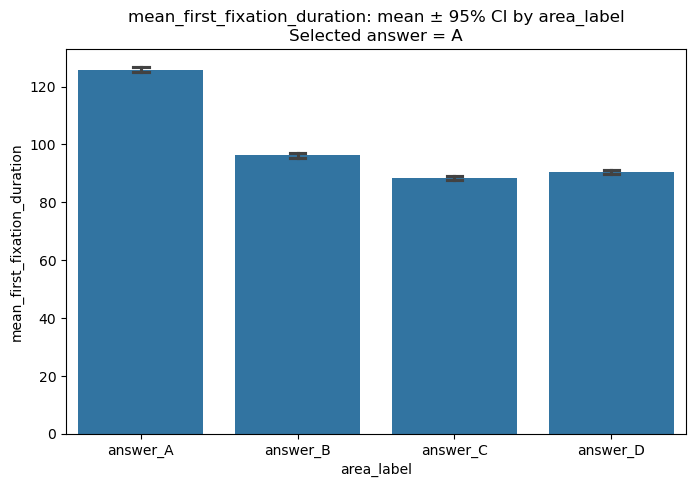

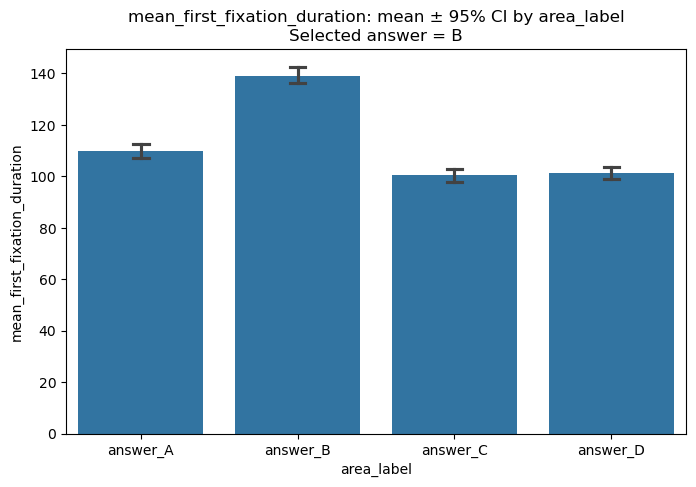

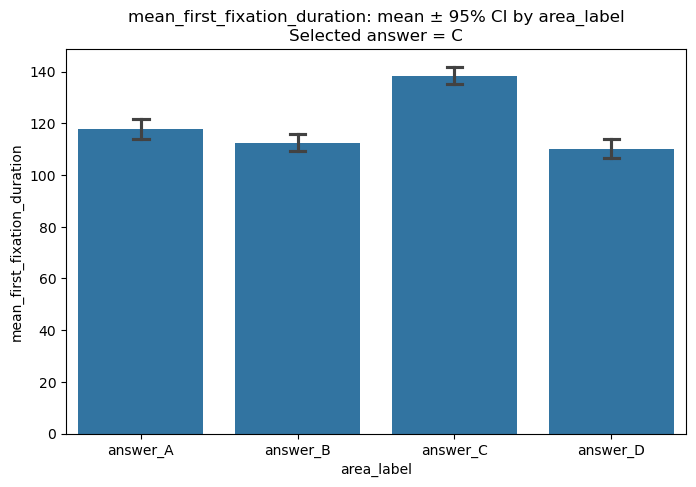

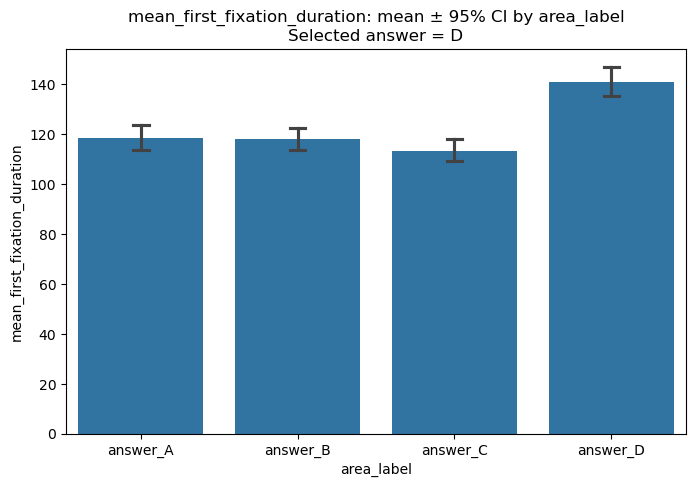

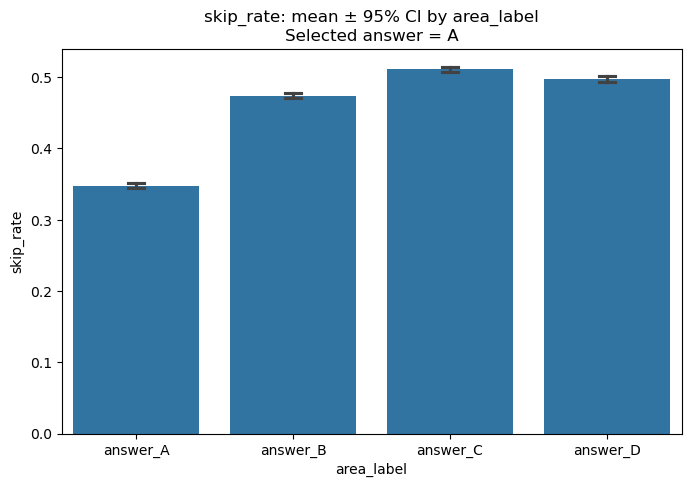

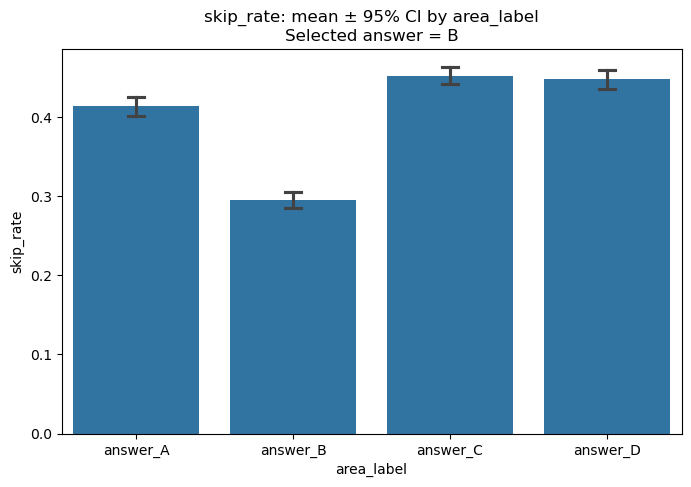

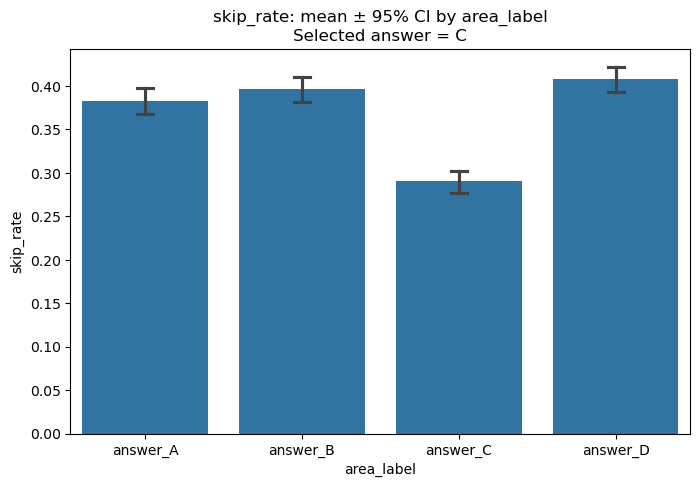

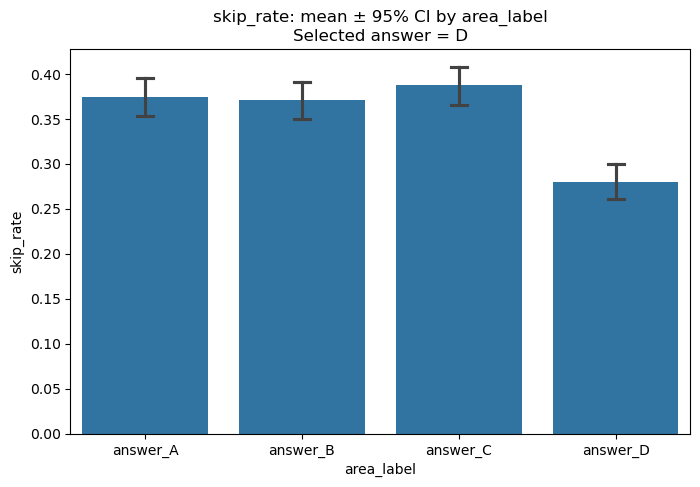

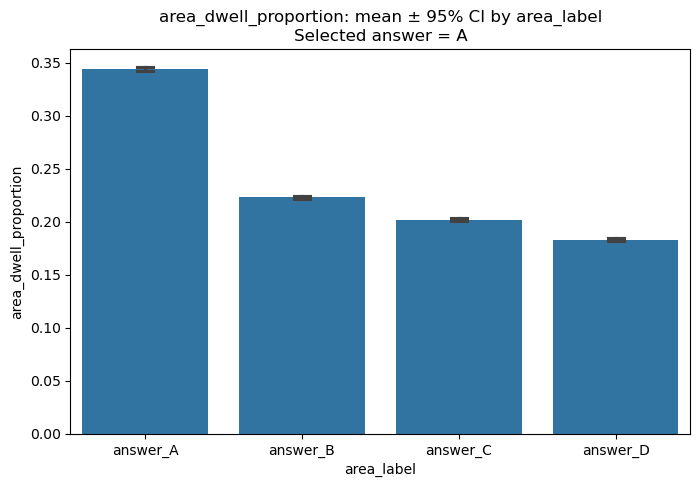

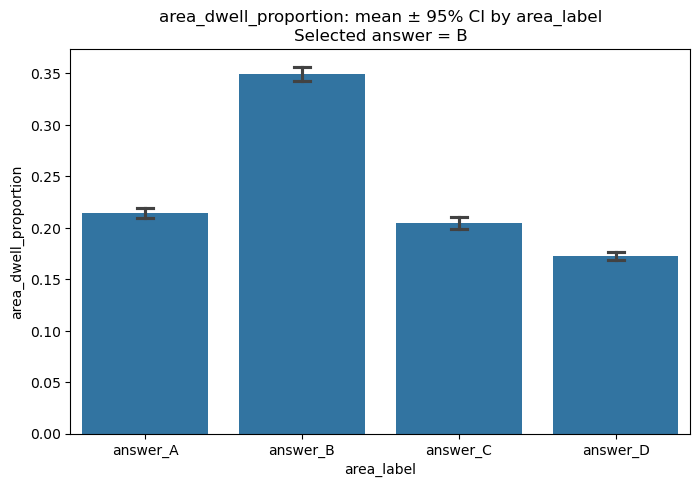

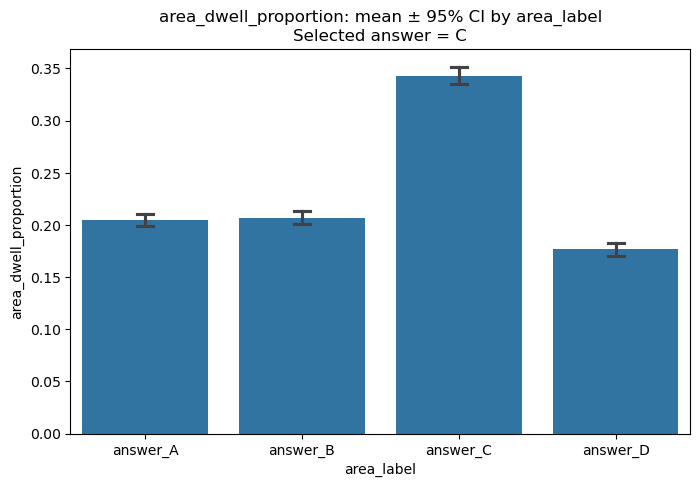

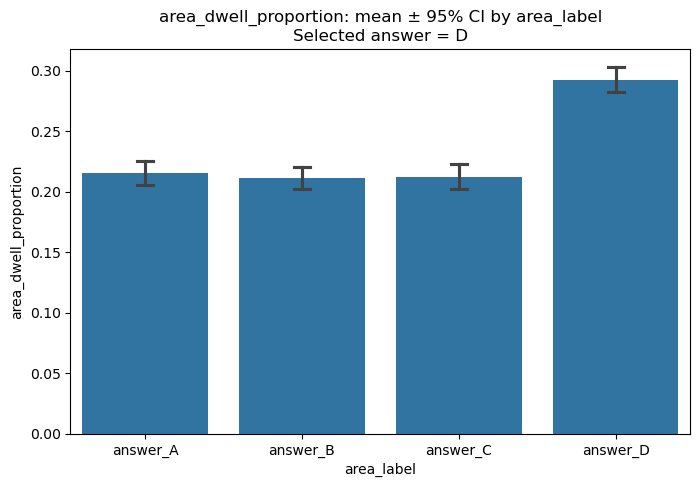

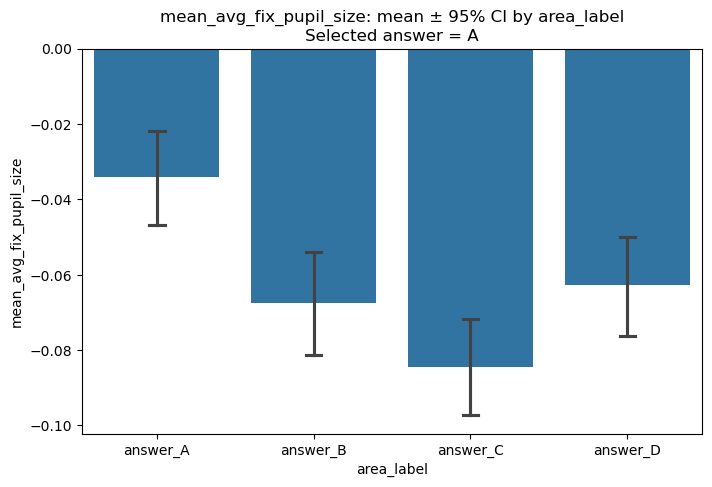

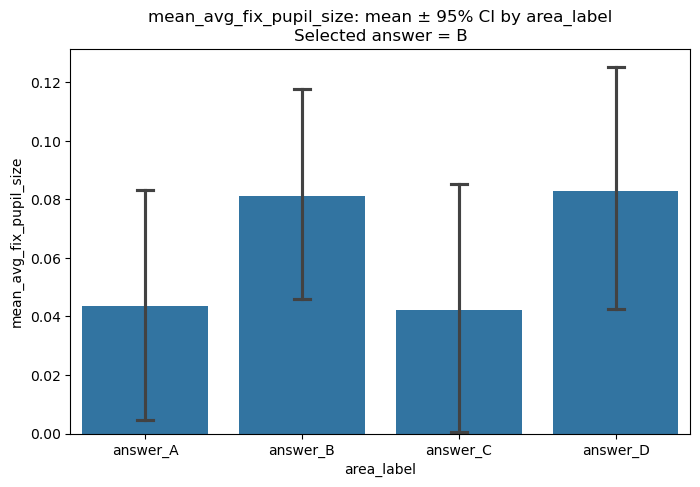

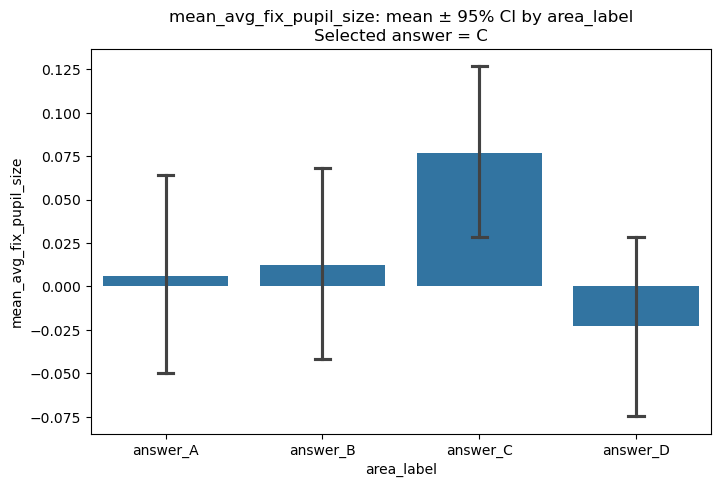

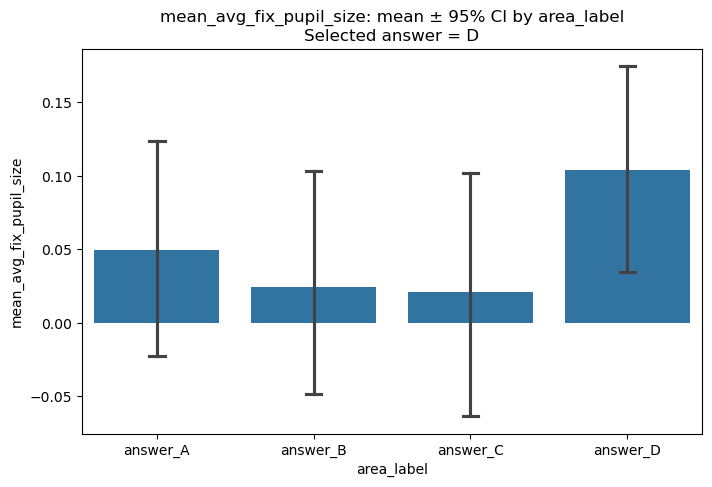

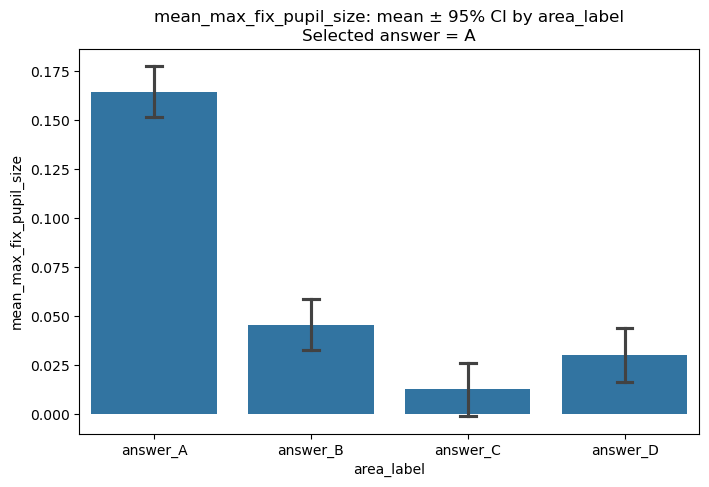

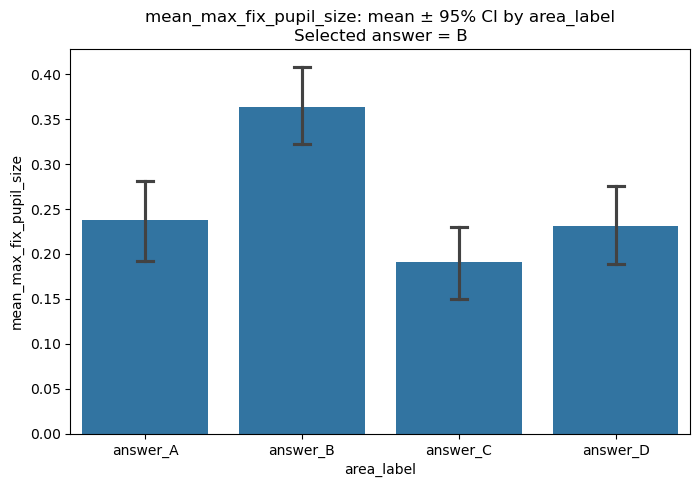

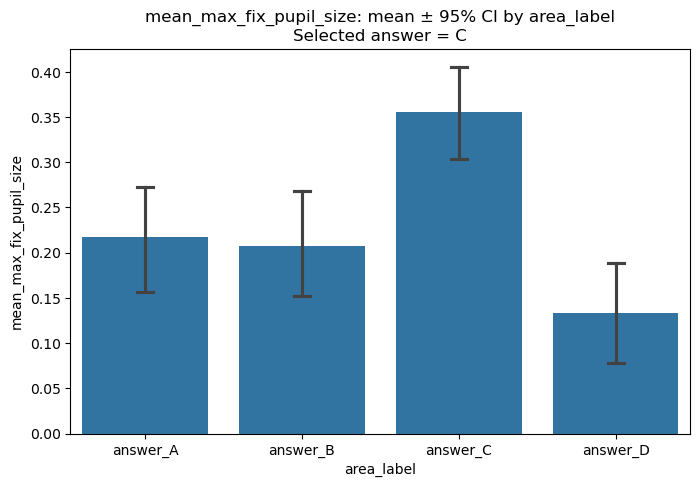

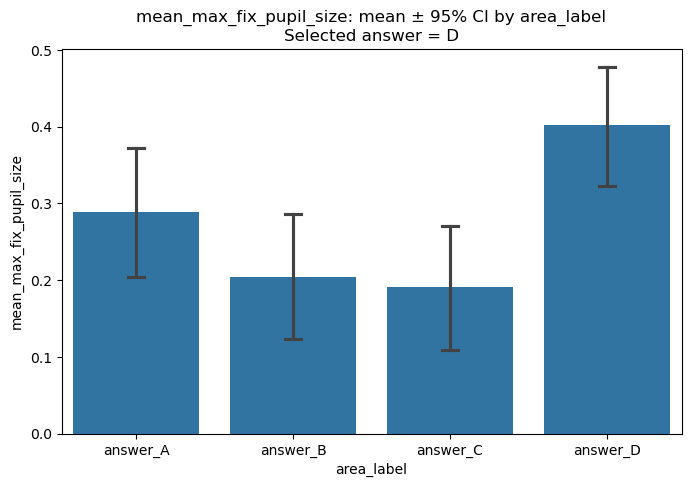

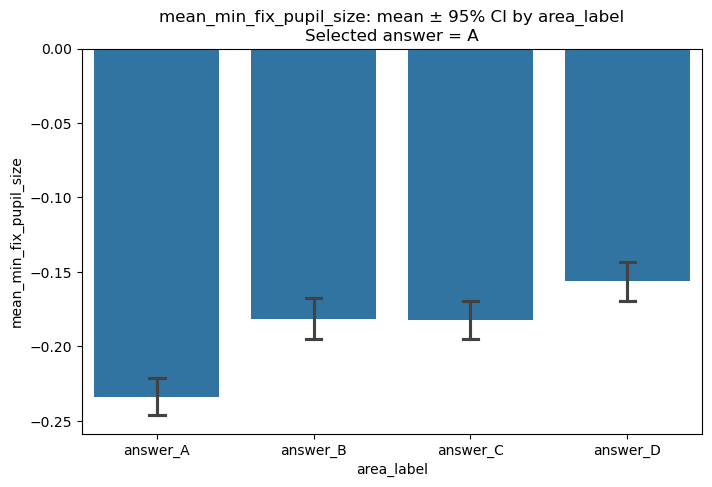

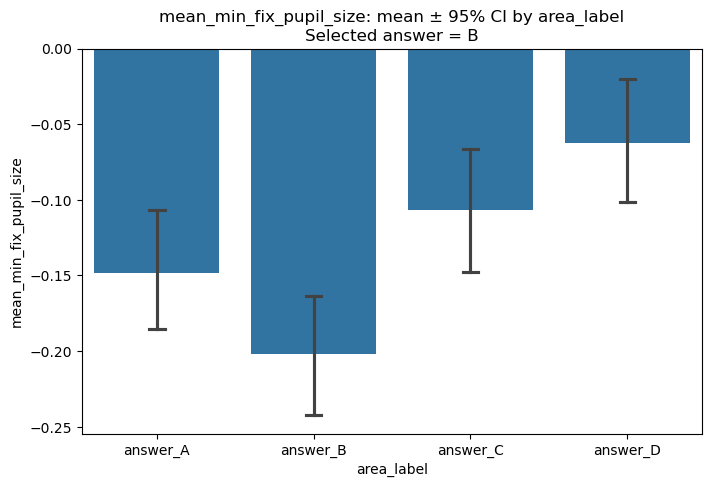

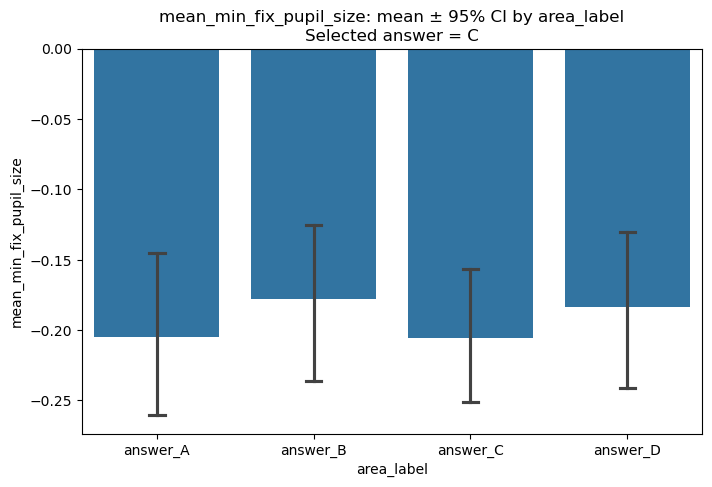

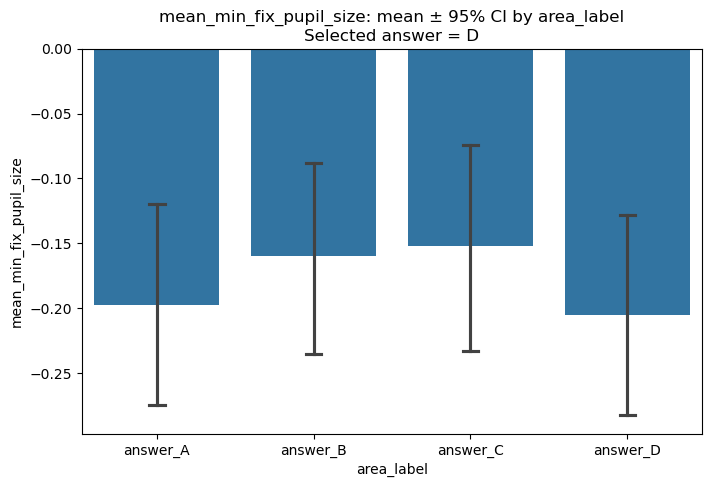

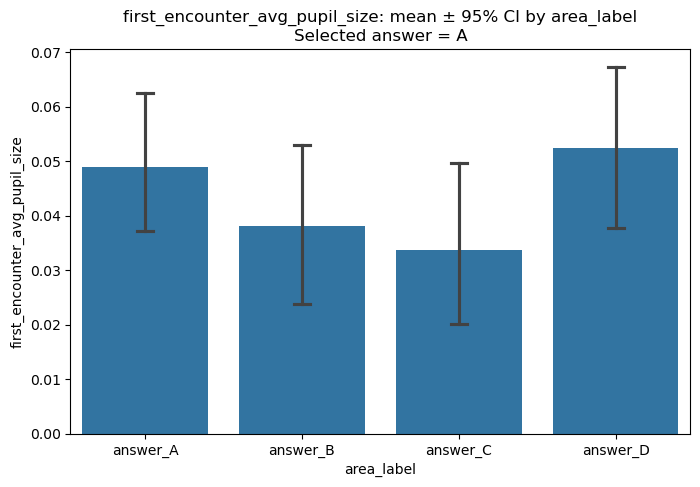

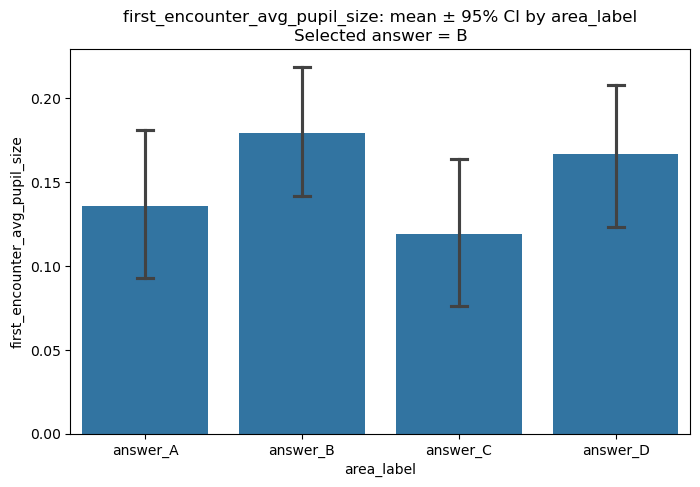

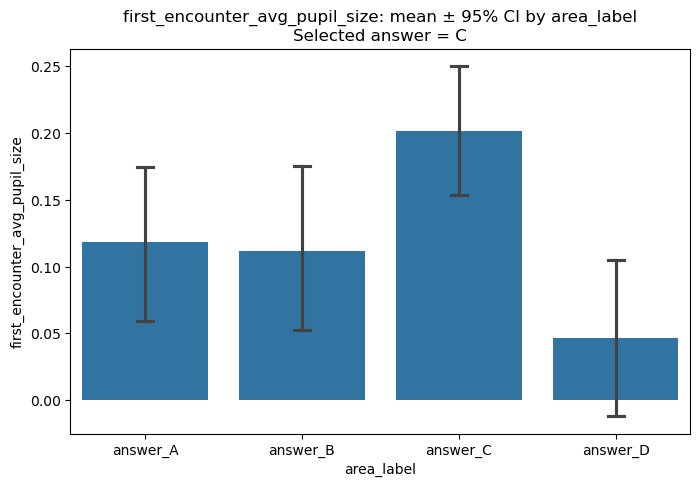

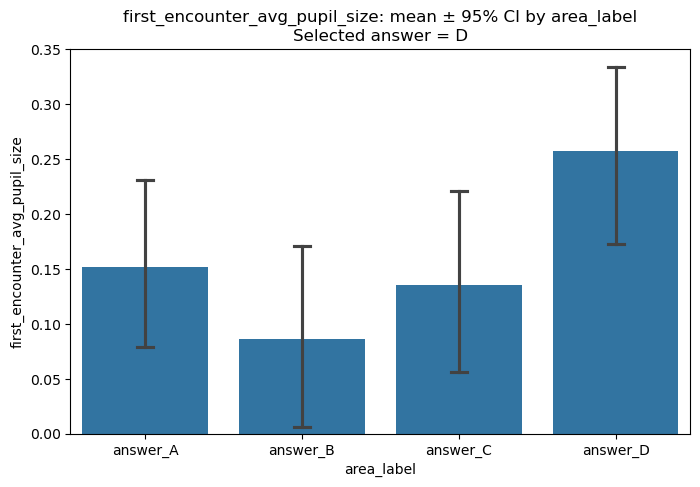

In [4]:
metrics = Con.AREA_METRIC_COLUMNS_MODELING

available_labels = sorted(all_participants[Con.SELECTED_ANSWER_LABEL_COLUMN].dropna().unique())
available_labels = [lab for lab in ["A", "B", "C", "D"] if lab in available_labels]

results = {}

for metric in metrics:
    results[metric] = {}

    for ans in available_labels:
        subset = all_participants[all_participants[Con.SELECTED_ANSWER_LABEL_COLUMN] == ans].copy()
        if subset.empty:
            continue

        fig, summary = V.plot_area_ci_bar(
            subset,
            stat_col=metric,
            h_or_g="all participants",
            selected=ans,
            save=True,
            paper_dirs=PAPER_DIRS,
        )
        results[metric][ans] = summary